<a href="https://colab.research.google.com/github/atharvaK718/Exploratory-Data-Analysis/blob/main/4.Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries and Dataset

In [3]:
# Load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/catholic.csv")

# Structure and Summary of Dataset

In [4]:
# Structure of the dataset
print("Structure of Dataset:\n", df.info())

# Summary of the dataset
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7430 entries, 0 to 7429
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  7430 non-null   int64  
 1   id        7430 non-null   int64  
 2   read12    7430 non-null   float64
 3   math12    7430 non-null   float64
 4   female    7430 non-null   int64  
 5   asian     7430 non-null   int64  
 6   hispan    7430 non-null   int64  
 7   black     7430 non-null   int64  
 8   motheduc  7430 non-null   float64
 9   fatheduc  7430 non-null   float64
 10  lfaminc   7430 non-null   float64
 11  hsgrad    5970 non-null   float64
 12  cathhs    7430 non-null   int64  
 13  parcath   7430 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 812.8 KB
Structure of Dataset:
 None
Summary Statistics:
           rownames            id       read12       math12       female  \
count  7430.000000  7.430000e+03  7430.000000  7430.000000  7430.000000   
mean   3715.500000

# Identify Missing Values

In [5]:
# Identify missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 rownames       0
id             0
read12         0
math12         0
female         0
asian          0
hispan         0
black          0
motheduc       0
fatheduc       0
lfaminc        0
hsgrad      1460
cathhs         0
parcath        0
dtype: int64


# Handling Missing Values

In [6]:
# Handling Missing Values
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numeric column
        df[column].fillna(df[column].mean(), inplace=True)

print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 rownames    0
id          0
read12      0
math12      0
female      0
asian       0
hispan      0
black       0
motheduc    0
fatheduc    0
lfaminc     0
hsgrad      0
cathhs      0
parcath     0
dtype: int64


<ipython-input-6-f3650487a46e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


# Correlation Analysis

Correlation Matrix:
           rownames        id    read12    math12    female     asian  \
rownames  1.000000  0.968289  0.052640  0.070361  0.001720  0.004322   
id        0.968289  1.000000  0.043128  0.060433  0.004247  0.019152   
read12    0.052640  0.043128  1.000000  0.710413  0.090907  0.074528   
math12    0.070361  0.060433  0.710413  1.000000 -0.081068  0.121457   
female    0.001720  0.004247  0.090907 -0.081068  1.000000 -0.002028   
asian     0.004322  0.019152  0.074528  0.121457 -0.002028  1.000000   
hispan    0.021395  0.003959 -0.107383 -0.127088  0.014279 -0.079321   
black    -0.018871  0.011946 -0.157817 -0.184359  0.043498 -0.064371   
motheduc  0.069392  0.059931  0.284593  0.342298 -0.033071  0.051362   
fatheduc  0.062776  0.058112  0.317025  0.375280 -0.031115  0.104724   
lfaminc   0.056118  0.053546  0.258644  0.316305 -0.043334  0.029599   
hsgrad    0.027417  0.022095  0.185408  0.243673 -0.011214  0.045632   
cathhs    0.028900  0.000218  0.071243  0.0

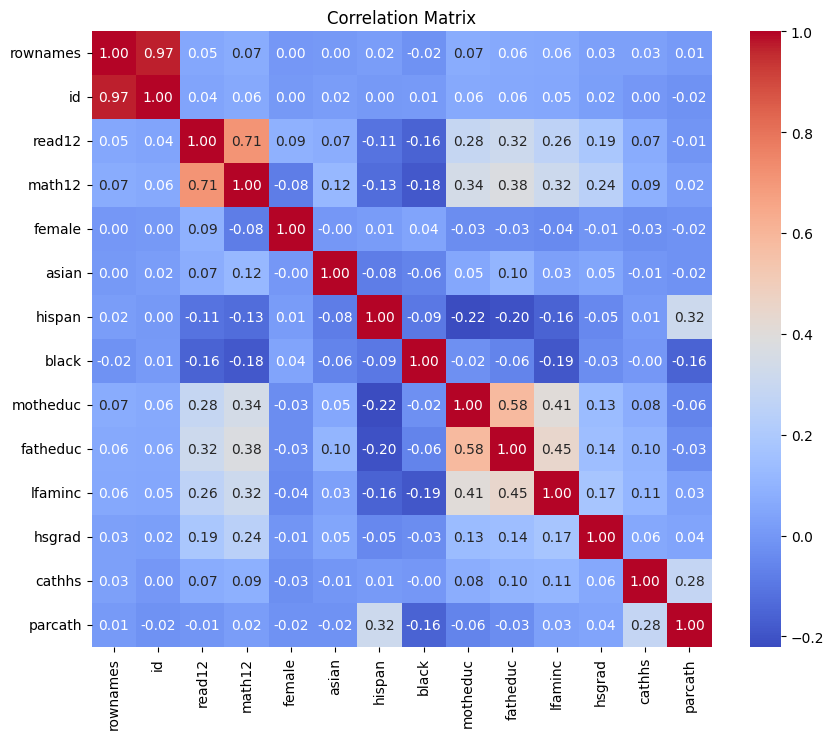

In [7]:
# Correlation analysis (between numeric variables)
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#  Measures of Central Tendency

In [8]:
# Measure of Central Tendency
mean_values = df.mean()
median_values = df.median()
quantiles = df.quantile([0.25, 0.5, 0.75])
percentiles = df.quantile([0.01, 0.05, 0.1, 0.9, 0.95, 0.99])

print("Mean Values:\n", mean_values)
print("Median Values:\n", median_values)
print("Quantiles:\n", quantiles)
print("Percentiles:\n", percentiles)

Mean Values:
 rownames    3.715500e+03
id          4.589838e+06
read12      5.177240e+01
math12      5.213362e+01
female      5.173620e-01
asian       5.168237e-02
hispan      1.034993e-01
black       7.065949e-02
motheduc    1.335686e+01
fatheduc    1.367416e+01
lfaminc     1.035332e+01
hsgrad      9.303183e-01
cathhs      6.083445e-02
parcath     3.458950e-01
dtype: float64
Median Values:
 rownames    3.715500e+03
id          4.592442e+06
read12      5.308000e+01
math12      5.253000e+01
female      1.000000e+00
asian       0.000000e+00
hispan      0.000000e+00
black       0.000000e+00
motheduc    1.400000e+01
fatheduc    1.400000e+01
lfaminc     1.030895e+01
hsgrad      1.000000e+00
cathhs      0.000000e+00
parcath     0.000000e+00
dtype: float64
Quantiles:
       rownames          id  read12   math12  female  asian  hispan  black  \
0.25   1858.25  2424049.00  44.525  45.0200     0.0    0.0     0.0    0.0   
0.50   3715.50  4592441.50  53.080  52.5300     1.0    0.0     0.0    0.0 

#  Measures of Dispersion

In [9]:
# Measure of Dispersion
range_values = df.max() - df.min()
iqr_values = df.quantile(0.75) - df.quantile(0.25)
std_dev = df.std()
variance = df.var()
skewness = df.skew()
kurtosis = df.kurt()

dispersion_summary = pd.DataFrame({
    'Range': range_values,
    'IQR': iqr_values,
    'Std Dev': std_dev,
    'Variance': variance,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("Measures of Dispersion:\n", dispersion_summary)

Measures of Dispersion:
                  Range           IQR       Std Dev      Variance  Skewness  \
rownames  7.429000e+03  3.714500e+03  2.145001e+03  4.601028e+06  0.000000   
id        7.854184e+06  4.817057e+06  2.744467e+06  7.532099e+12 -0.193297   
read12    3.894000e+01  1.494500e+01  9.407761e+00  8.850597e+01 -0.366950   
math12    4.187000e+01  1.483750e+01  9.459117e+00  8.947490e+01 -0.146420   
female    1.000000e+00  1.000000e+00  4.997321e-01  2.497322e-01 -0.069504   
asian     1.000000e+00  0.000000e+00  2.213999e-01  4.901790e-02  4.050936   
hispan    1.000000e+00  0.000000e+00  3.046304e-01  9.279971e-02  2.603859   
black     1.000000e+00  0.000000e+00  2.562724e-01  6.567556e-02  3.351559   
motheduc  1.000000e+01  2.000000e+00  2.005982e+00  4.023964e+00 -0.304348   
fatheduc  1.000000e+01  4.000000e+00  2.267797e+00  5.142905e+00 -0.164345   
lfaminc   6.131222e+00  6.359900e-01  7.945188e-01  6.312601e-01 -1.185925   
hsgrad    1.000000e+00  6.968174e-02  2

# Frequency Distribution and Plots

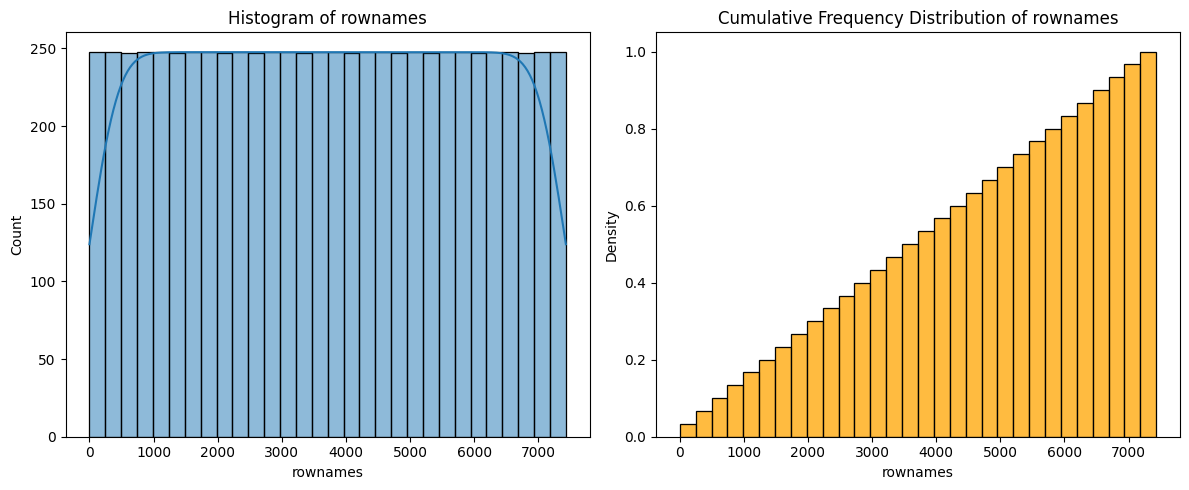

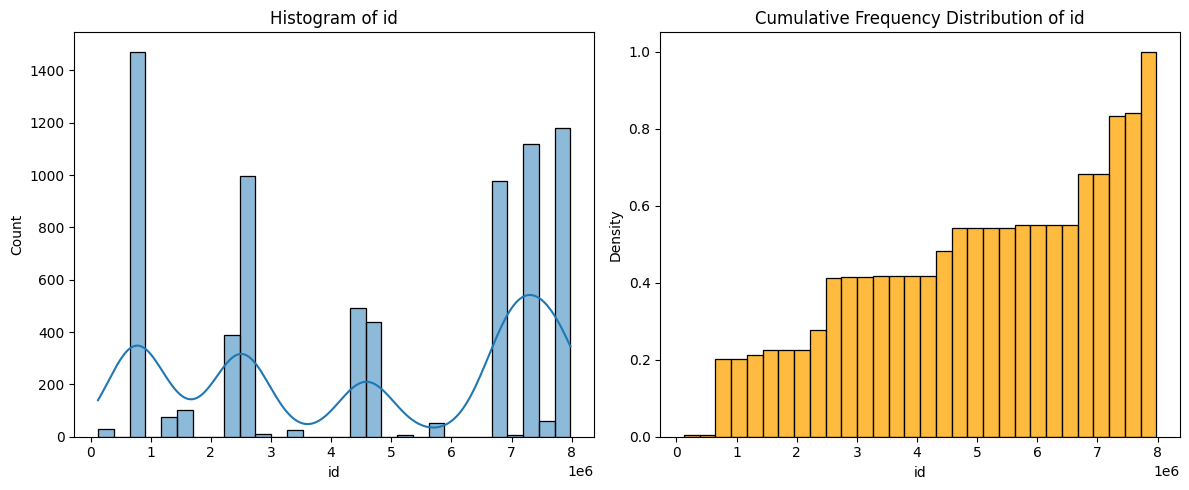

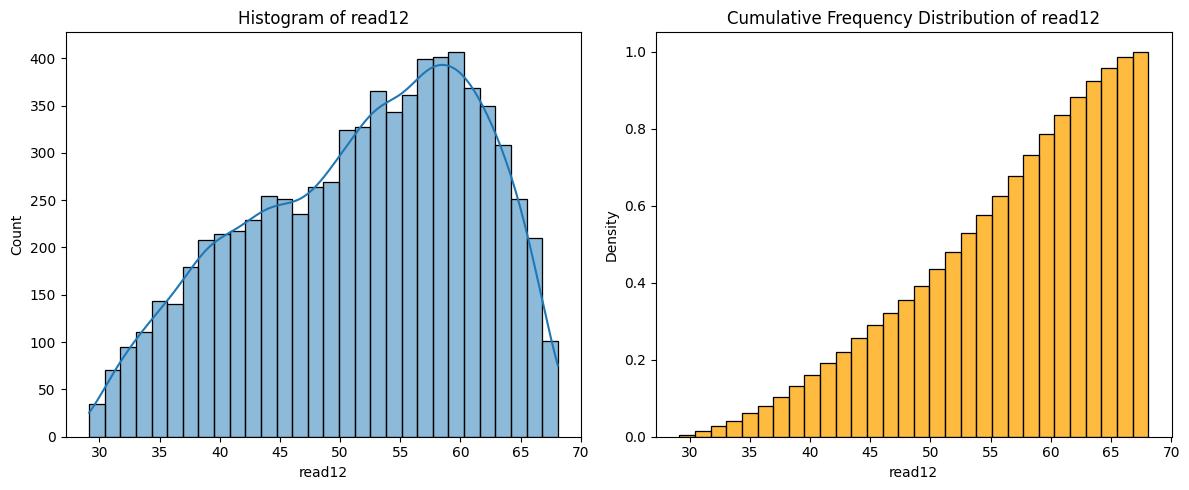

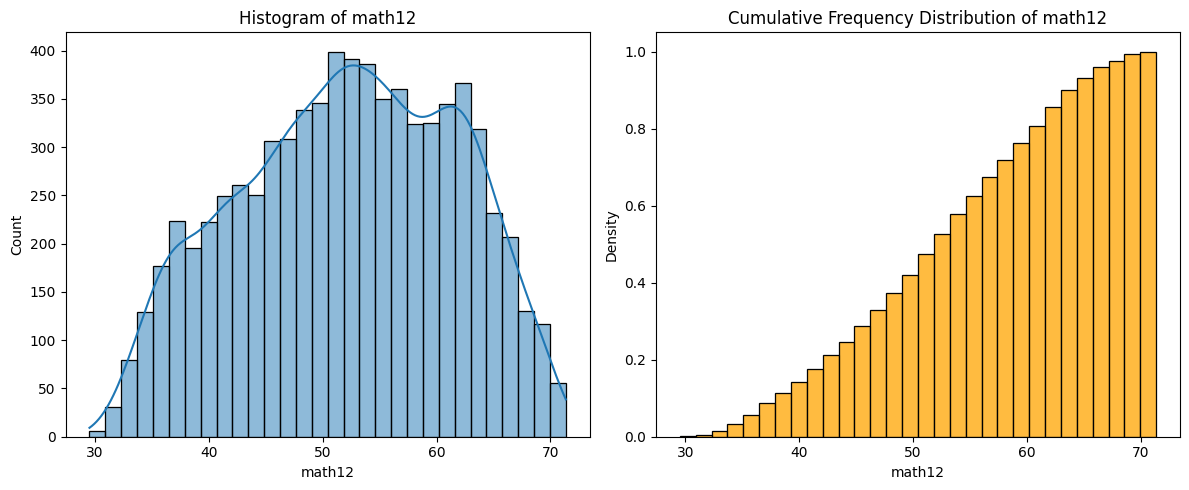

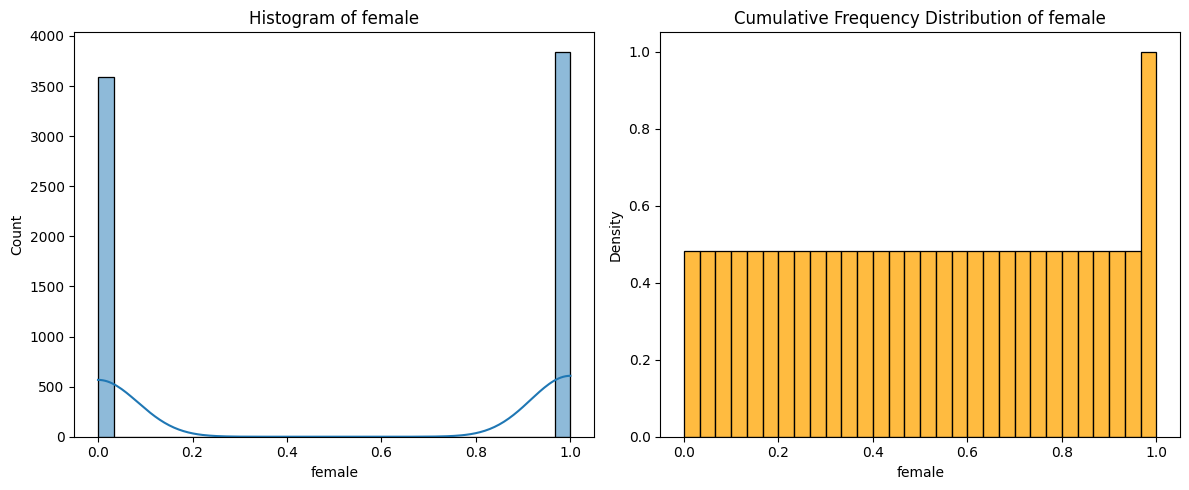

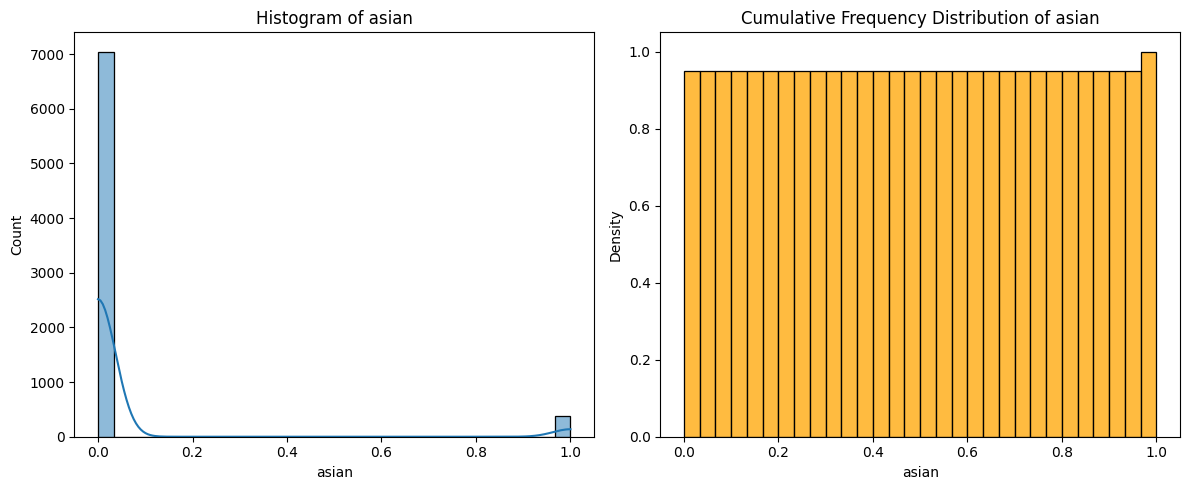

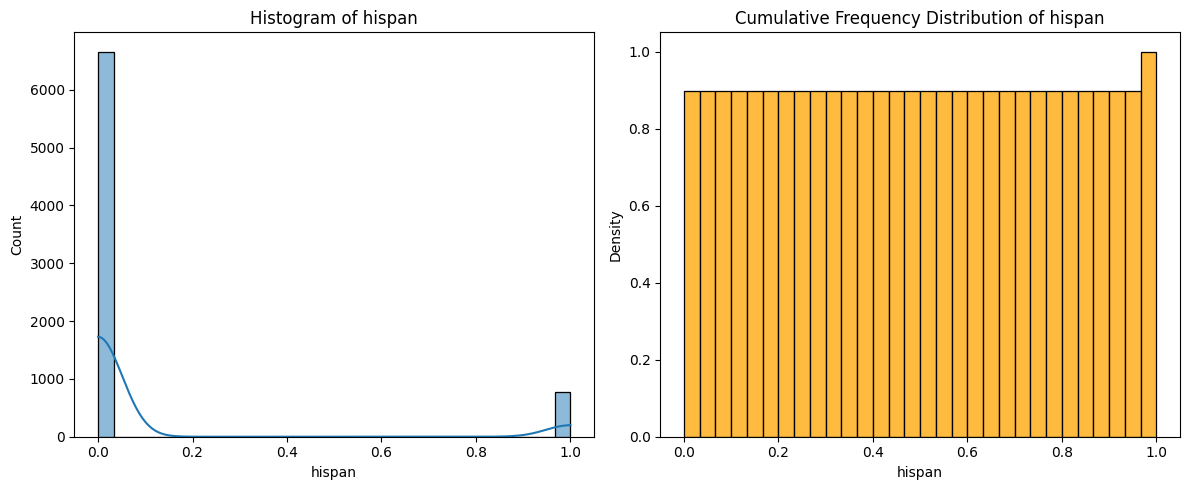

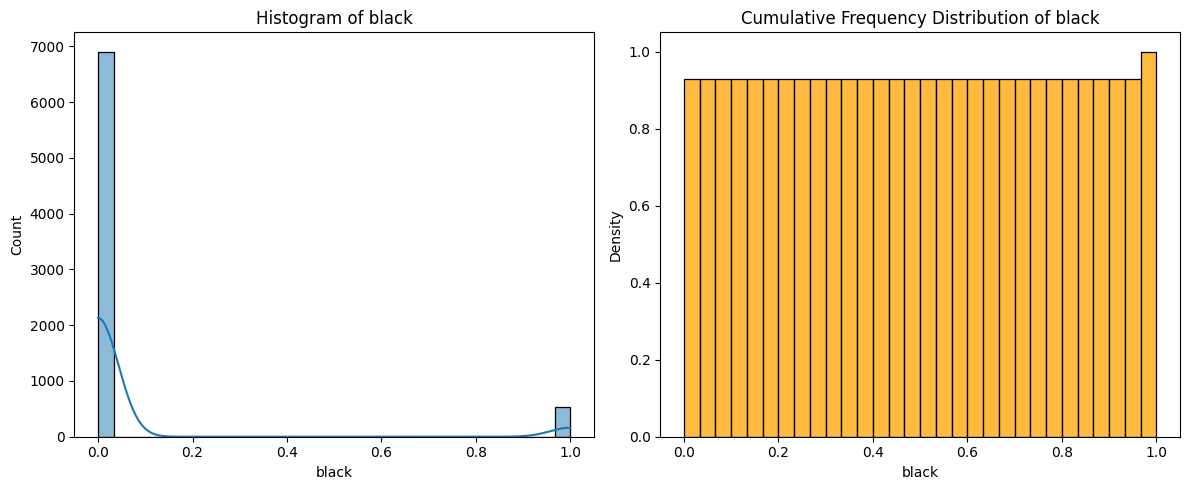

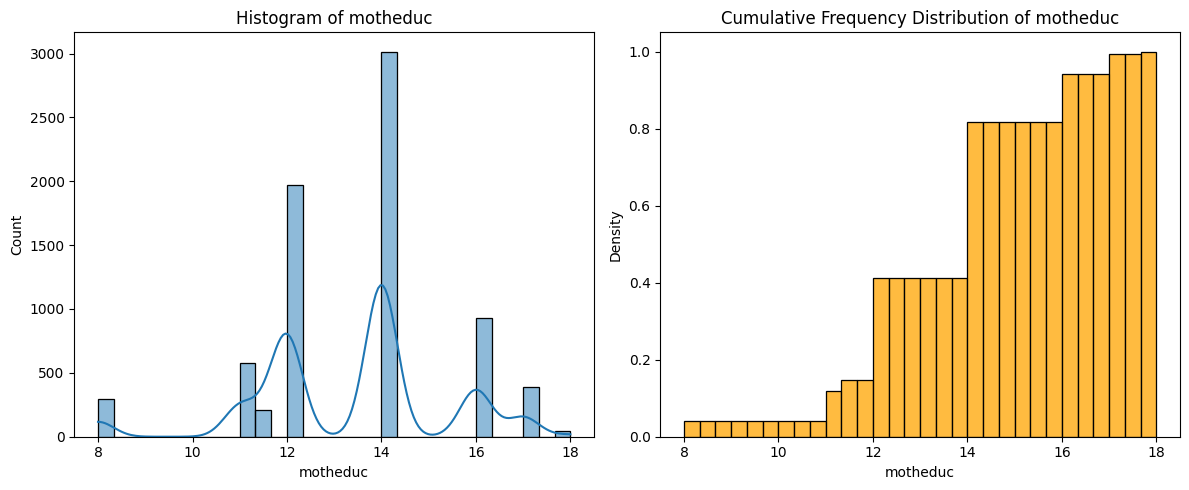

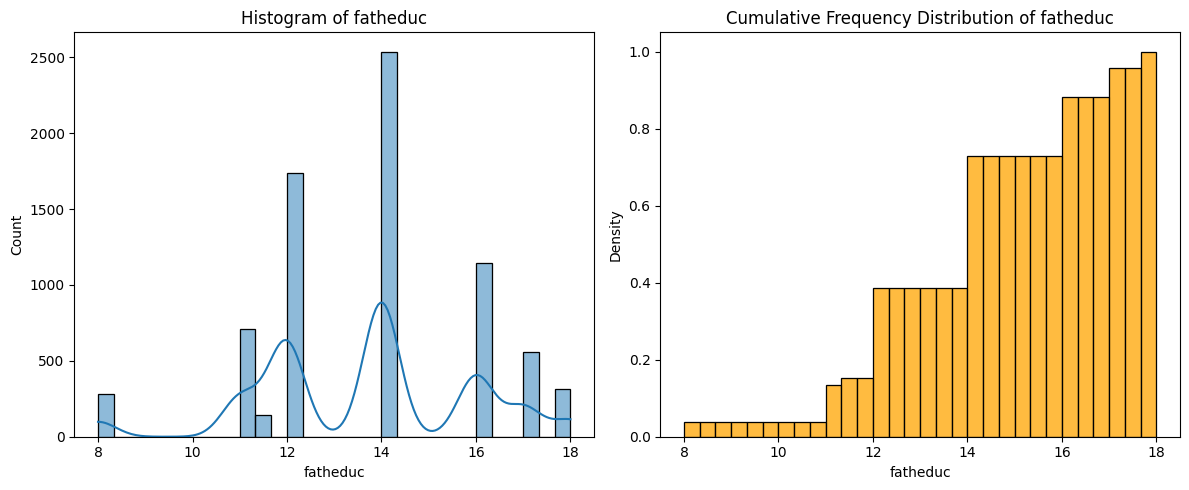

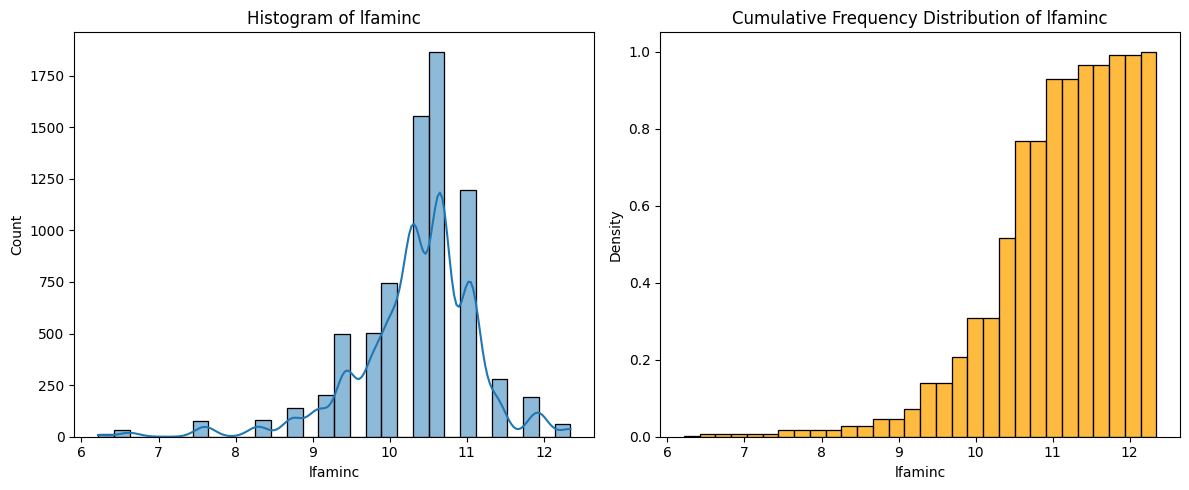

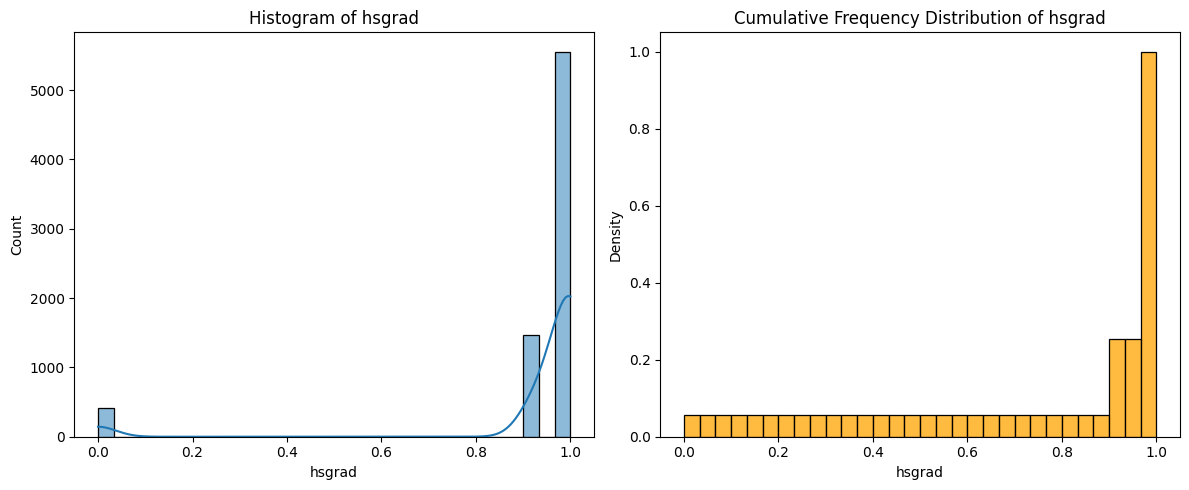

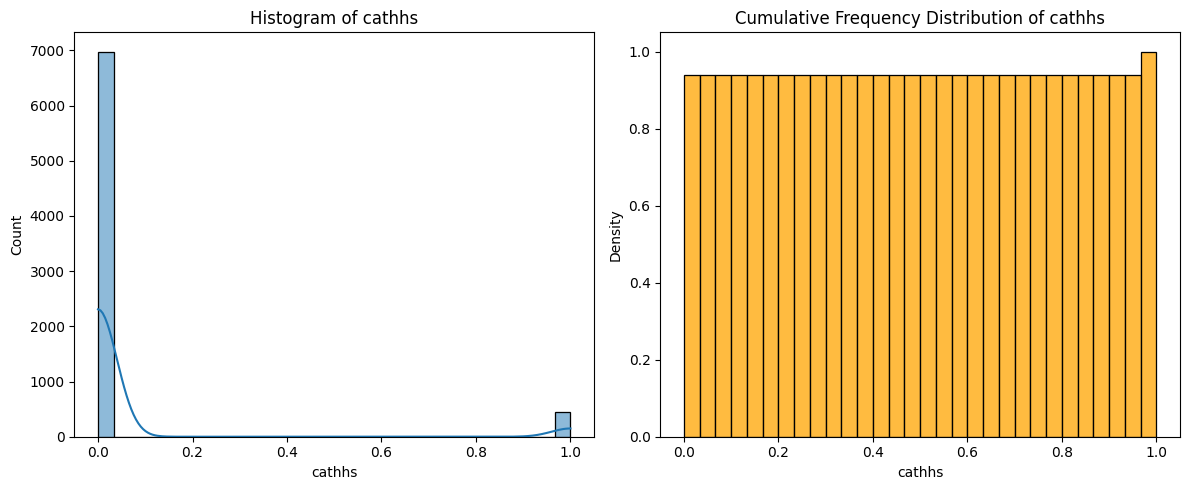

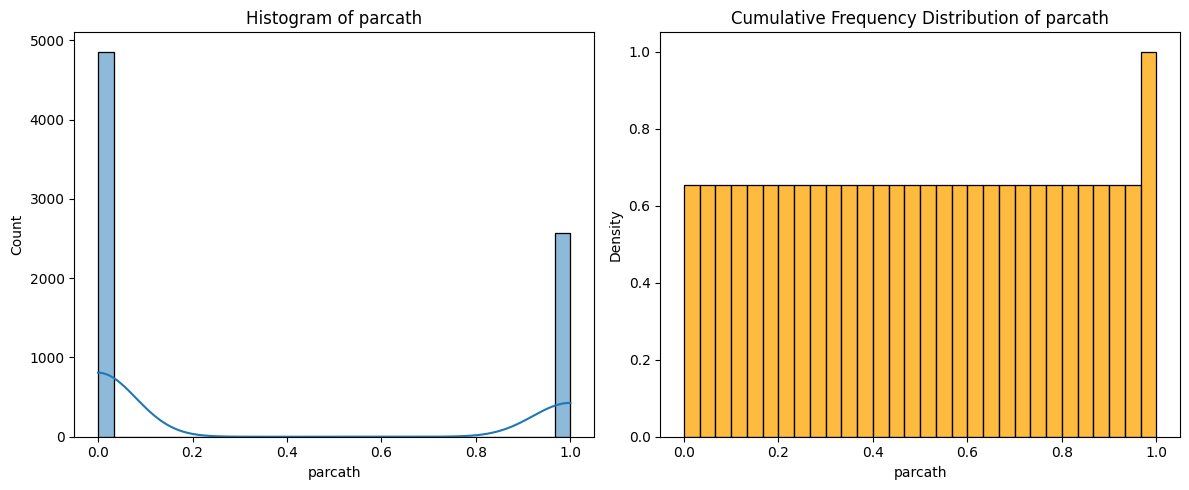

In [11]:
# Frequency Distribution for numeric variables
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

    # Cumulative Frequency Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df[column], bins=30, cumulative=True, color='orange', stat="density")
    plt.title(f'Cumulative Frequency Distribution of {column}')

    plt.tight_layout()
    plt.show()

# Categorical Variables Visualization

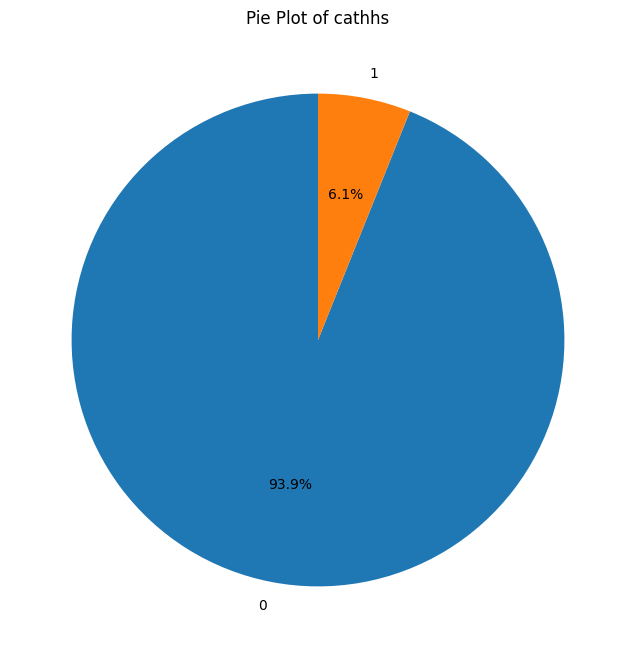

<Figure size 1000x600 with 0 Axes>

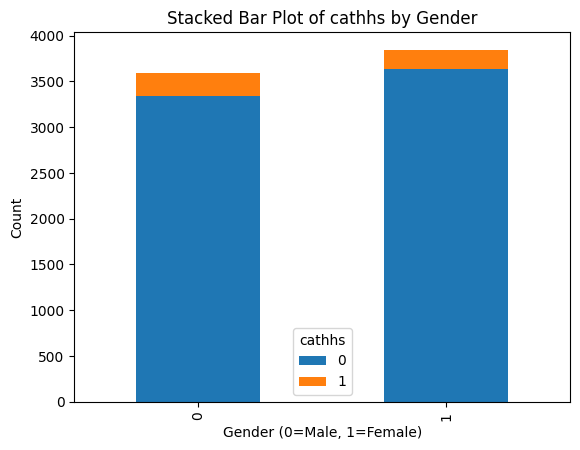

In [12]:
# Pie Plot for a categorical variable
category_column = 'cathhs'  # Change to a categorical column of your choice
plt.figure(figsize=(8, 8))
df[category_column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title(f'Pie Plot of {category_column}')
plt.ylabel('')
plt.show()

# Stacked Bar Plot
plt.figure(figsize=(10, 6))
pd.crosstab(df['female'], df[category_column]).plot(kind='bar', stacked=True)
plt.title(f'Stacked Bar Plot of {category_column} by Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Count')
plt.legend(title=category_column)
plt.show()